<a href="https://colab.research.google.com/github/halepino/dsc650/blob/master/dsc650/assignments/assignment06/Assignment6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Holly Figueroa
###DSC650 Week 6 Assignments  

**Bsed on Book Exercise 5.2**  
A Convolutional Network for Multiple Category Image Classification

##**6.2 Part A**

In [4]:
# Load Libraries
import tensorflow as tf
from keras.utils import to_categorical
from keras import models
from keras import layers
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

In [6]:
# Load Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [7]:
# View shapes
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [8]:
# Turn to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize
x_train, x_test = x_train/255.0, x_test/255.0

# Encode image labels
y_train, y_test = to_categorical(y_train, 10),to_categorical(y_test,10)

In [9]:
# Write Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)        

In [11]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer= optimizers.RMSprop(learning_rate=1e-4),
              metrics= ['accuracy'])


In [12]:
# Fit model
history = model.fit(x_train, y_train,
              batch_size = 32,
              epochs=50,
              steps_per_epoch=x_train.shape[0]//50,
              validation_data=(x_test, y_test)
             )

Epoch 1/50
1000/1000 [==============================] - 59s 58ms/step - loss: 1.9327 - accuracy: 0.2915 - val_loss: 1.7716 - val_accuracy: 0.3596
Epoch 2/50
1000/1000 [==============================] - 56s 56ms/step - loss: 1.6474 - accuracy: 0.3996 - val_loss: 1.5661 - val_accuracy: 0.4357
Epoch 3/50
1000/1000 [==============================] - 55s 55ms/step - loss: 1.5225 - accuracy: 0.4507 - val_loss: 1.5224 - val_accuracy: 0.4556
Epoch 4/50
1000/1000 [==============================] - 55s 55ms/step - loss: 1.4376 - accuracy: 0.4838 - val_loss: 1.4677 - val_accuracy: 0.4704
Epoch 5/50
1000/1000 [==============================] - 56s 56ms/step - loss: 1.3820 - accuracy: 0.5071 - val_loss: 1.3438 - val_accuracy: 0.5181
Epoch 6/50
1000/1000 [==============================] - 55s 55ms/step - loss: 1.3263 - accuracy: 0.5283 - val_loss: 1.3109 - val_accuracy: 0.5363
Epoch 7/50
1000/1000 [==============================] - 56s 56ms/step - loss: 1.2786 - accuracy: 0.5469 - val_loss: 1.2606 -

In [13]:
# Save Model
model.save('6.2a_cifar_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
# Test Accuracy with Test Data
results = model.evaluate(x_test, y_test)

313/313 [==============================] - 7s 24ms/step - loss: 0.8615 - accuracy: 0.6957


In [28]:
# Make predictions
predictions = model.predict(x_test)
predictions.shape


313/313 [==============================] - 13s 40ms/step


(10000, 10)

In [27]:
# Save Predictions
import numpy as np
np.save('6.2a_predictions', predictions)

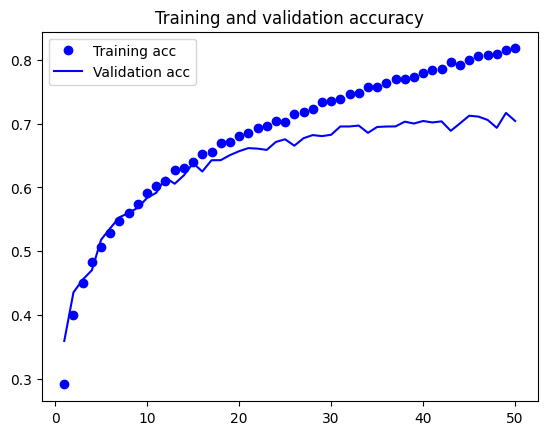

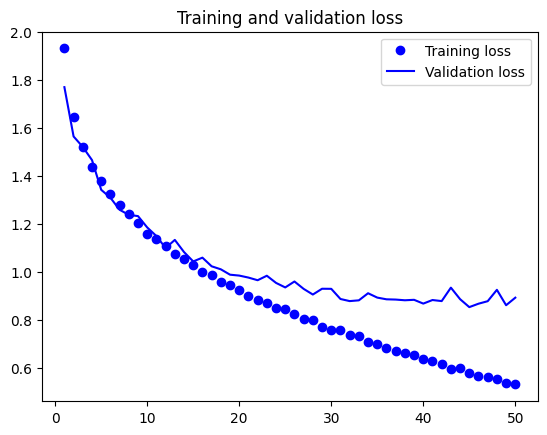

In [22]:
# Plot Accuracy
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

##**6.2 Part B**

In [23]:
# Redesign model
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))


model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.3))

model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())

# Add Dropout layer and final layers
model2.add(layers.Dropout(0.3))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

# Compile
model2.compile(loss='categorical_crossentropy',
              optimizer= optimizers.RMSprop(learning_rate=1e-4),
              metrics= ['accuracy'])

In [29]:
# Load Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Turn to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalize
x_train, x_test = x_train/255.0, x_test/255.0
# Encode image labels
y_train, y_test = to_categorical(y_train, 10),to_categorical(y_test,10)

In [30]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, vertical_flip=True )
train_generator = data_generator.flow(x_train, y_train, batch_size)

In [31]:
steps_per_epoch = x_train.shape[0] // batch_size

history2 = model2.fit(train_generator,
              epochs=25,
              steps_per_epoch=steps_per_epoch,
              batch_size = batch_size,
              validation_data=(x_test, y_test))

Epoch 1/25
1562/1562 [==============================] - 124s 79ms/step - loss: 2.0209 - accuracy: 0.2404 - val_loss: 1.7998 - val_accuracy: 0.3321
Epoch 2/25
1562/1562 [==============================] - 119s 76ms/step - loss: 1.7764 - accuracy: 0.3367 - val_loss: 1.6666 - val_accuracy: 0.3719
Epoch 3/25
1562/1562 [==============================] - 118s 76ms/step - loss: 1.6813 - accuracy: 0.3764 - val_loss: 1.5952 - val_accuracy: 0.4015
Epoch 4/25
1562/1562 [==============================] - 118s 76ms/step - loss: 1.6283 - accuracy: 0.3992 - val_loss: 1.5174 - val_accuracy: 0.4372
Epoch 5/25
1562/1562 [==============================] - 119s 76ms/step - loss: 1.5836 - accuracy: 0.4155 - val_loss: 1.4646 - val_accuracy: 0.4605
Epoch 6/25
1562/1562 [==============================] - 116s 74ms/step - loss: 1.5401 - accuracy: 0.4349 - val_loss: 1.5357 - val_accuracy: 0.4407
Epoch 7/25
1562/1562 [==============================] - 113s 72ms/step - loss: 1.5076 - accuracy: 0.4517 - val_loss: 1

In [32]:
# Save Model
model2.save('6.2b_cifar_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
# Test Accuracy with Test Data
results = model2.evaluate(x_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.1348 - accuracy: 0.5941


In [34]:
# Make predictions
predictions = model2.predict(x_test)
predictions.shape

313/313 [==============================] - 6s 17ms/step


(10000, 10)

In [35]:
# Save Predictions
import numpy as np
np.save('6.2b_predictions', predictions)

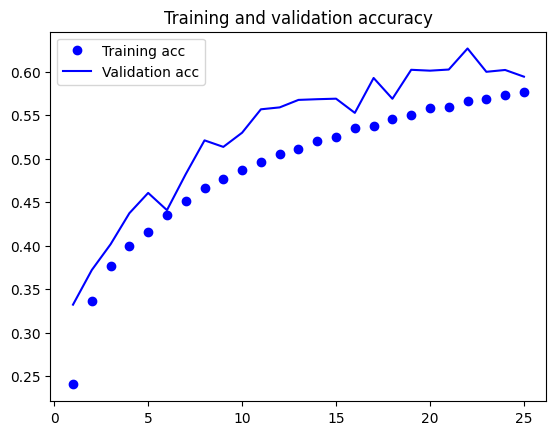

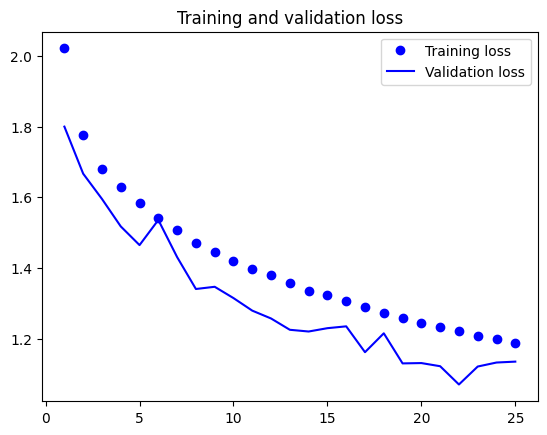

In [36]:
# Plot
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()